In [1]:
import pandas as pd
import numpy as np

def problem1(filename):
    # Read exel file 
    data=pd.read_excel(filename)
    # Get features from dropping outputs
    X = data.drop(['Y1', 'Y2'], axis=1).values
    # Get outputs from data
    y_1= ((data['Y1']).values).reshape(-1, 1)
    y_2= ((data['Y2']).values).reshape(-1, 1)
    # Import libraries
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split,GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    # Set paramaters for random forest regressor
    param_grid = {
        'max_depth': [50,150,250],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [2,3],
        'n_estimators': [10,50,100,250,500]
    }
    # Set parameters for ridge regressor
    ridge_params={
        'alpha':[0.001,0.01,0.1, 1.0, 10.0]
    }
    # This list is used in loop. 
    # The outer loop iterate each output y_1 and y_2 and the inner loop iterate two types error
    outputs=[y_1,y_2]
    ridge_means=[]
    ridge_std=[]
    forest_means=[]
    forest_std=[]
    # Outer loop
    for index,y_x in  enumerate(outputs):
        # Inner loop
        for score in ["neg_mean_absolute_error","neg_mean_squared_error"]:
            # Split data randomly.
            X_train , X_test , y_train , y_test = train_test_split(X , y_x , test_size=0.2 , random_state =42)
            # Scale data for get good model
            from sklearn.preprocessing import StandardScaler
            scaler=StandardScaler()
            X_train=scaler.fit_transform(X_train)
            X_test=scaler.transform(X_test)
            # 10-fold 10-repetative cross validation method 
            from sklearn.model_selection import RepeatedKFold,cross_val_score
            cv=RepeatedKFold(n_splits=10,n_repeats=10,random_state=True)
            temp_ridge=Ridge()
            # In this line, using gridsearchcv, we can get best parameters for ridge regression
            grid_search_ridge=GridSearchCV(estimator = temp_ridge, param_grid = ridge_params, cv = cv, n_jobs = -1)
            grid_search_ridge.fit(X_train,y_train.ravel())
            print("Best parameter for ridge regression",grid_search_ridge.best_params_)
            # Using best parameters, the best model is created.
            model=Ridge(**grid_search_ridge.best_params_)
            model.fit(X_train,y_train)
            # Using best model, we can get mean and standart deviation
            scores_ridge = cross_val_score(model, X_train, y_train,scoring=score, cv=cv)
            ridge_means.append(-scores_ridge.mean())
            ridge_std.append(scores_ridge.std())
            # Create a random forest regressor
            rf = RandomForestRegressor()
            # Find best parameters using grid search
            grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1)
            grid_search.fit(X_train,y_train.ravel())
            print("Best parameter for Random forest regression",grid_search.best_params_)
            # create a model using best parameters
            last_model=RandomForestRegressor(**grid_search.best_params_)
            scores_randomforest= cross_val_score(last_model, X_train, y_train.ravel(),scoring=score, cv=cv)
            forest_means.append(-scores_randomforest.mean())
            forest_std.append(scores_randomforest.std())
            # print("RandomForest","Y",index+1," ",score,"-----",-scores.mean(),scores.std()
    # In this line prettytable is used to print results as table.
    from prettytable import PrettyTable
    x=PrettyTable(["-","Mean Absolute Error","*","Mean Square Error","/"])
    x.add_row(["Output","RandomForest","RidgeRegression","RandomForest","RidgeRegression"])
    x.add_row(["Y1",str(forest_means[0])+u"\u00B1"+str(forest_std[0]),str(ridge_means[0])+u"\u00B1"+str(ridge_std[0]),
                    str(forest_means[1])+u"\u00B1"+str(forest_std[1]),str(ridge_means[1])+u"\u00B1"+str(ridge_std[1])])
    x.add_row(["Y2",str(forest_means[2])+u"\u00B1"+str(forest_std[2]),str(ridge_means[2])+u"\u00B1"+str(ridge_std[2]),
                    str(forest_means[3])+u"\u00B1"+str(forest_std[3]),str(ridge_means[3])+u"\u00B1"+str(ridge_std[3])])
    print(x)

In [2]:
problem1("ENB2012_data.xlsx")


Best parameter for ridge regression {'alpha': 0.1}
Best parameter for Random forest regression {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best parameter for ridge regression {'alpha': 0.1}
Best parameter for Random forest regression {'max_depth': 250, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best parameter for ridge regression {'alpha': 0.1}
Best parameter for Random forest regression {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best parameter for ridge regression {'alpha': 0.1}
Best parameter for Random forest regression {'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
+--------+---------------------------------------+----------------------------------------+-----------------------------------------+--------------------------------------+
|   -    |          Mean Absolute Error          |                   *                    |          

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RepeatedKFold,KFold,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
def problem2(filename):
    # Read data using pandas library
    data = pd.read_csv(filename, sep = ';')
    #Converting dependent variable categorical to dummy
    y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
    y=y.values.reshape(-1, 1)
    # Firstly I divided categorical data different parts. 
    # data_c includes client features
    # I used labelencoder because it gives better result
    data_c = data.iloc[: , 0:7]
    labelencoder_X = LabelEncoder()
    data_c['job']      = labelencoder_X.fit_transform(data_c['job']) 
    data_c['marital']  = labelencoder_X.fit_transform(data_c['marital']) 
    data_c['education']= labelencoder_X.fit_transform(data_c['education']) 
    data_c['default']  = labelencoder_X.fit_transform(data_c['default']) 
    data_c['housing']  = labelencoder_X.fit_transform(data_c['housing']) 
    data_c['loan']     = labelencoder_X.fit_transform(data_c['loan']) 
    # The client age is divided four range. I get the idea different projects. It is useful
    data_c.loc[data_c['age'] <= 32, 'age'] = 1
    data_c.loc[(data_c['age'] > 32) & (data_c['age'] <= 47), 'age'] = 2
    data_c.loc[(data_c['age'] > 47) & (data_c['age'] <= 70), 'age'] = 3
    data_c.loc[(data_c['age'] > 70) & (data_c['age'] <= 98), 'age'] = 4
    # try to convert contact, month, day_of_week data to numerical
    data_r = data.iloc[: , 7:11]
    data[(data['duration'] == 0)]
    labelencoder_X = LabelEncoder()
    data_r['contact']     = labelencoder_X.fit_transform(data_r['contact']) 
    data_r['month']       = labelencoder_X.fit_transform(data_r['month']) 
    data_r['day_of_week'] = labelencoder_X.fit_transform(data_r['day_of_week']) 
    # I did samething like before  I did to age column
    data_r.loc[data['duration'] <= 102, 'duration'] = 1
    data_r.loc[(data['duration'] > 102) & (data_r['duration'] <= 180)  , 'duration']    = 2
    data_r.loc[(data['duration'] > 180) & (data_r['duration'] <= 319)  , 'duration']   = 3
    data_r.loc[(data['duration'] > 319) & (data_r['duration'] <= 644.5), 'duration'] = 4
    data_r.loc[data['duration']  > 644.5, 'duration'] = 5

    data_s = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
    data_o = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
    data_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
    # To combine data after data preprocessing
    data_final= pd.concat([data_c, data_r, data_s, data_o], axis = 1)
    data_final = data_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                        'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
    # Split data 
    X_train, X_test, y_train, y_test = train_test_split(data_final, y.ravel(), test_size = 0.2, random_state = 101)
    # Scale data
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    # create cross validation method
    cv=RepeatedKFold(n_splits=5,n_repeats=5,random_state=True)
    # Create a loop that is range from 10^-4 to 10^4
    # And put each values as C parameter
    all_scores=[]
    for x in np.logspace(-4,4,20):
        model=LogisticRegression(C=x)
        model.fit(X_train,y_train)
        scores=cross_val_score(model, X_train, y_train.ravel(),scoring="roc_auc", cv=cv)
        all_scores.append(scores.mean())

    # Plot scores
    plt.plot(np.logspace(-4,4,20,endpoint=True),all_scores,'-gD')
    plt.xscale("log")
    plt.ylabel("Mean Auc Score")
    plt.title("Logistic Regression Model")
    # Create paramater list 
    param_grid = {
    'max_depth': [50,150,250],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3],
    'n_estimators': [10,50,100,250,500,1000]
    }
    # Create cross validation method
    cv=RepeatedKFold(n_splits=3,n_repeats=3,random_state=True)
    rf = RandomForestRegressor()
    grid_search_logi = GridSearchCV(estimator = rf, param_grid = param_grid, 
                            cv = cv, n_jobs = -1)
    
    grid_search_logi.fit(X_train,y_train.ravel())
    # get best parameters for random forest regressor
    print("Best parameters of Random regressor",grid_search_logi.best_params_);
    last_model_logi=RandomForestRegressor(**grid_search_logi.best_params_)
    scores = cross_val_score(last_model_logi, X_train, y_train.ravel(),scoring="roc_auc", cv=cv)
    scores.mean()
    # create neural network using MLPClassifier
    mlp_classifier=MLPClassifier(max_iter=500)
    # Create parameter list
    parameter_space = {
        'hidden_layer_sizes': [(10,10,10),(10,10,10,10),(10,10,10,10,10),(10,10,10,10,10,10)],
        'alpha': [0.00001, 0.0001,0.001, 0.01, 0.1],
    }
    grid_search = GridSearchCV(estimator = mlp_classifier, param_grid = parameter_space, 
                            cv = cv, n_jobs = -1,scoring='roc_auc')
    grid_search.fit(X_train,y_train.ravel())
    print("Best parameters for Neural Network",grid_search.best_params_)
    # Variables for average classification report
    from sklearn.metrics import classification_report,make_scorer,accuracy_score
    originalclass = []
    predictedclass = []
    #Make our customer score
    def classification_report_with_accuracy_score(y_true, y_pred):
        originalclass.extend(y_true)
        predictedclass.extend(y_pred)
        return accuracy_score(y_true, y_pred) # return accuracy score


    logistic_reg=LogisticRegression(C=1)
    best_neural=MLPClassifier(**grid_search.best_params_)
    best_randomforest=RandomForestClassifier(**grid_search_logi.best_params_)
    # best_randomforest.fit(X_train,y_train.ravel())
    # y_pred=best_randomforest.predict(X_test)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=True)
    # Nested CV with parameter optimization
    nested_score = cross_val_score(logistic_reg, X=X_train, y=y_train.ravel(), cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
    print("classification report for logistic regression")
    print(classification_report(originalclass, predictedclass)) 
    originalclass.clear()
    predictedclass.clear()
    nested_score = cross_val_score(best_neural, X=X_train, y=y_train.ravel(), cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
    print("classification report for neural network")
    print(classification_report(originalclass, predictedclass)) 
    originalclass.clear()
    predictedclass.clear()
    nested_score = cross_val_score(best_randomforest, X=X_train, y=y_train.ravel(), cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
    print("classification report for Random forest")
    print(classification_report(originalclass, predictedclass)) 

Best parameters of Random regressor {'max_depth': 150, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
Best parameters for Neural Network {'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10, 10, 10)}
classification report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29269
           1       0.67      0.38      0.49      3681

    accuracy                           0.91     32950
   macro avg       0.80      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950

classification report for neural network
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29269
           1       0.62      0.55      0.58      3681

    accuracy                           0.91     32950
   macro avg       0.78      0.75      0.77     32950
weighted avg       0.91      0.91      0.91     32950

classification report for Random forest
 

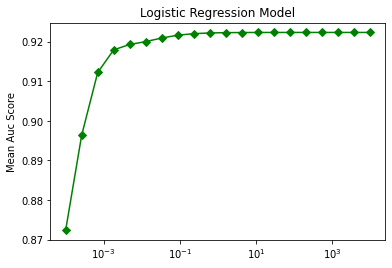

In [2]:
problem2('bank-additional-full.csv')